# Calculate Autocorrelation of SST and SSS

calculates autocorrelation for basinwide average sea surface temperature and salinity.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy

from tqdm import tqdm

In [24]:
# User Edits: set one of the below to true
detrended = False # Set to True to use detrended data
latweight = True # Set to True to use latitude-weighted area average

# Save options
savefig = True # Save autocorrelation figure
savedat = True  # Save computed autocorrelation
datpath = "../../CESM_data/" # Path to save data

In [12]:
%%time
# Load data in
if detrended:
    sst_normed = np.load('../../CESM_data/CESM_SST_normalized_detrended.npy').astype(np.float32)
    sss_normed = np.load('../../CESM_data/CESM_SSS_normalized_detrended.npy').astype(np.float32)
    
if latweight:
    sst_normed = np.load('../../CESM_data/CESM_SST_normalized_lat_weighted.npy').astype(np.float32)
    sss_normed = np.load('../../CESM_data/CESM_SSS_normalized_lat_weighted.npy').astype(np.float32)

sst_normed.shape

CPU times: user 277 ms, sys: 1.09 s, total: 1.37 s
Wall time: 1.37 s


(42, 1032, 89, 33)

In [13]:
%%time
# Take area average
sst_ensemble = np.mean(sst_normed,axis=(2,3))
sss_ensemble = np.mean(sss_normed,axis=(2,3))

CPU times: user 108 ms, sys: 948 µs, total: 109 ms
Wall time: 108 ms


In [14]:
# Calculate Autocorrelation
tstep = 1032
lags  = 25
sst_lagged_corr = np.zeros((42,lags))
sss_lagged_corr = np.zeros((42,lags))

for lead in range(lags):
    sst_lead = sst_ensemble[:,lead:]
    sst_lag = sst_ensemble[:,0:tstep-lead]
    sss_lag = sss_ensemble[:,0:tstep-lead]
    
    for ien in range(42):
        sst_lagged_corr[ien,lead] = np.corrcoef( sst_lead[ien,:],sst_lag[ien,:] )[0,1]
        sss_lagged_corr[ien,lead] = np.corrcoef( sst_lead[ien,:],sss_lag[ien,:] )[0,1]

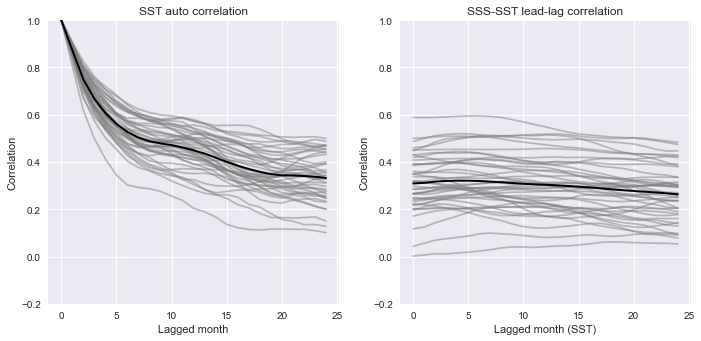

In [31]:
# Plot Sample Figure
plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 15})
57656

lag_time = np.arange(0,lags,1)
plt.subplot(121)
for ien in range(42):
    plt.plot( lag_time, sst_lagged_corr[ien,:], color='gray', alpha=0.5 )

plt.plot(lag_time,np.mean(sst_lagged_corr,axis=0),color='k',linewidth=2)
plt.ylim([-0.2,1])
plt.xlabel('Lagged month')
plt.ylabel('Correlation')
plt.title('SST auto correlation')

plt.subplot(122)
for ien in range(42):
    plt.plot( lag_time, sss_lagged_corr[ien,:], color='gray', alpha=0.5 )
plt.plot(lag_time,np.mean(sss_lagged_corr,axis=0),color='k',linewidth=2)
plt.ylim([-0.2,1])
plt.xlabel('Lagged month (SST)')
plt.ylabel('Correlation')
plt.title('SSS-SST lead-lag correlation')
plt.tight_layout()

if savefig:
    plt.savefig('SST_SSS_autocorrelation_detrended%i_latweight%i.pdf'%(detrended,latweight))
plt.show()

In [28]:
# Save data if option is set
if savedat:
    np.save('SST_autocorrelation_detrended%i_latweight%i.npy'%(detrended,latweight),sst_lagged_corr)
    np.save('SSS-SST_lead-lag_detrended%i_latweight%i.npy'%(detrended,latweight),sss_lagged_corr)